<h3 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import Required Libraries</h3>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

print("Lbraries Loaded Successfully")

Lbraries Loaded Successfully


<h3 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>📌 Import and Preprocessing Dataset</h3>

In [85]:
df = pd.read_csv('Datasets/US President Heights.csv')
labels =['Very short', 'Short', 'Medium', 'Tall', 'Very tall']
df['Height Category'] = pd.cut(df['height(cm)'], bins=5, labels=labels, include_lowest=True)
df.sample(10)

,order,name,height(cm),Height Category
7,8,Martin Van Buren,168,Very short
43,46,Joseph Biden,182,Tall
10,11,James K. Polk,173,Short
31,34,Dwight D. Eisenhower,179,Medium
27,30,Calvin Coolidge,178,Medium
18,19,Rutherford B. Hayes,174,Short
13,14,Franklin Pierce,178,Medium
32,35,John F. Kennedy,183,Tall
40,43,George W. Bush,182,Tall
9,10,John Tyler,183,Tall


<h3 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>📌 What is Statistics distributions of U.S. president's heights?</h3>

In [92]:
from scipy.stats import skew, kurtosis
def compute_overall_distribution_stats(df):
    results = []
    for col in df.select_dtypes(include=[np.number]).columns:
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode().iloc[0] if not df[col].mode().empty else np.nan
        std_dev = df[col].std()
        variance = df[col].var()
        value_range = df[col].max() - df[col].min()
        skewness_val = skew(df[col], nan_policy='omit')  # Skewness
        kurtosis_val = kurtosis(df[col], nan_policy='omit')  # Kurtosis

       
        results.append({
            'Parameter': col,
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Range': value_range,
            'Skewness': skewness_val,
            'Kurtosis': kurtosis_val
        })

    
    result_df = pd.DataFrame(results)
    return result_df

result = compute_overall_distribution_stats(df)
result

,Parameter,Mean,Median,Mode,Standard Deviation,Variance,Range,Skewness,Kurtosis
0,order,23.522727,24.0,1,13.729087,188.487844,45,-0.004994,-1.278262
1,height(cm),180.045455,182.0,183,7.064337,49.904863,30,-0.262818,-0.474469


<h3 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>📌 What is the overall distributions of U.S. president's heights?</h3>

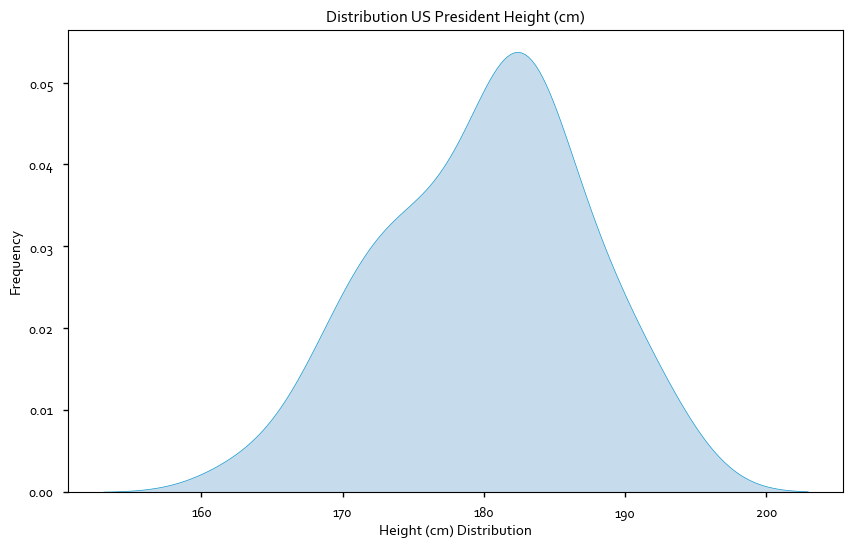

In [136]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.kdeplot(data=df, x=df['height(cm)'], fill = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Distribution US President Height (cm)')
plt.xlabel('Height (cm) Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Visualizations/Kernel Density Estimation Plots (KDE) 0001.png')
plt.show()

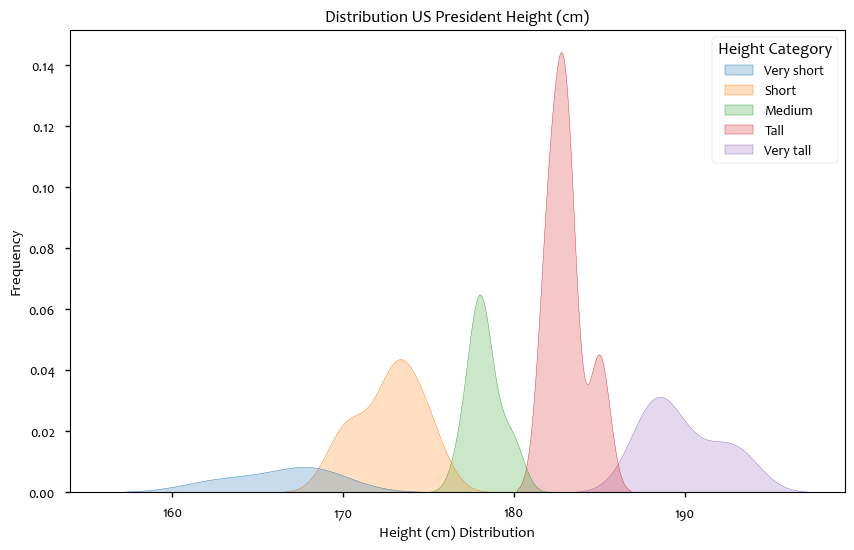

In [137]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.kdeplot(data=df, x=df['height(cm)'], fill=True, hue = 'Height Category')
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Distribution US President Height (cm)')
plt.xlabel('Height (cm) Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Visualizations/Kernel Density Estimation Plots (KDE) 0002.png')
plt.show()

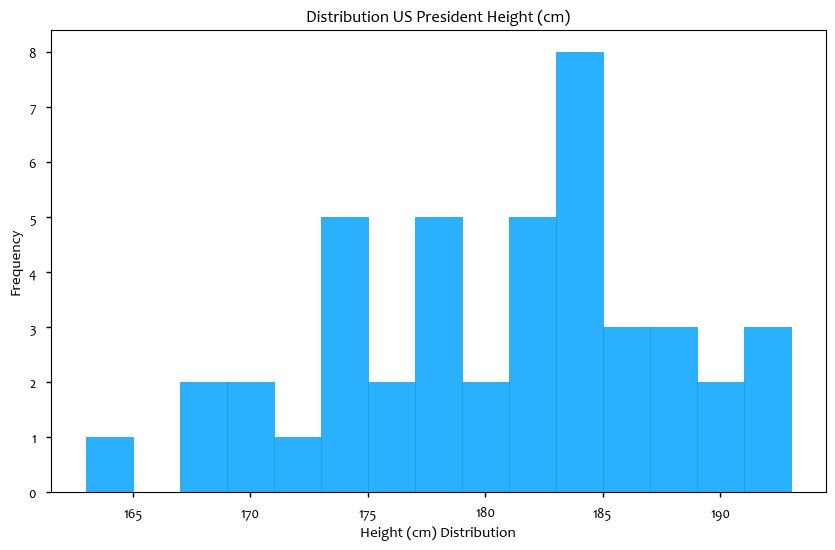

In [138]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.histplot(data=df, x=df['height(cm)'], bins=15, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Distribution US President Height (cm)')
plt.xlabel('Height (cm) Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Visualizations/Histogram (Frequency Distributions) 0001.png')
plt.show()

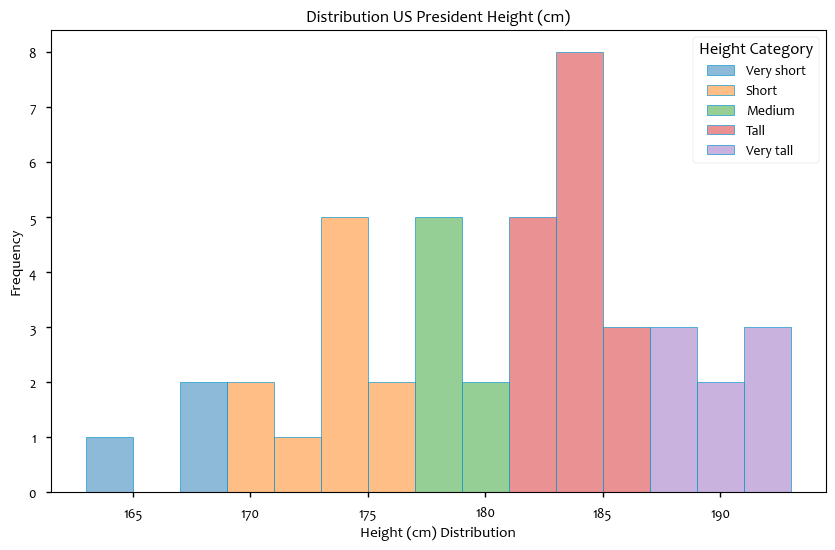

In [139]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.histplot(data=df, x=df['height(cm)'], bins=15, hue = 'Height Category', edgecolor='#169acf', linewidth=0.5)
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Distribution US President Height (cm)')
plt.xlabel('Height (cm) Distribution')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Visualizations/Histogram (Frequency Distributions) 0002.png')
plt.show()

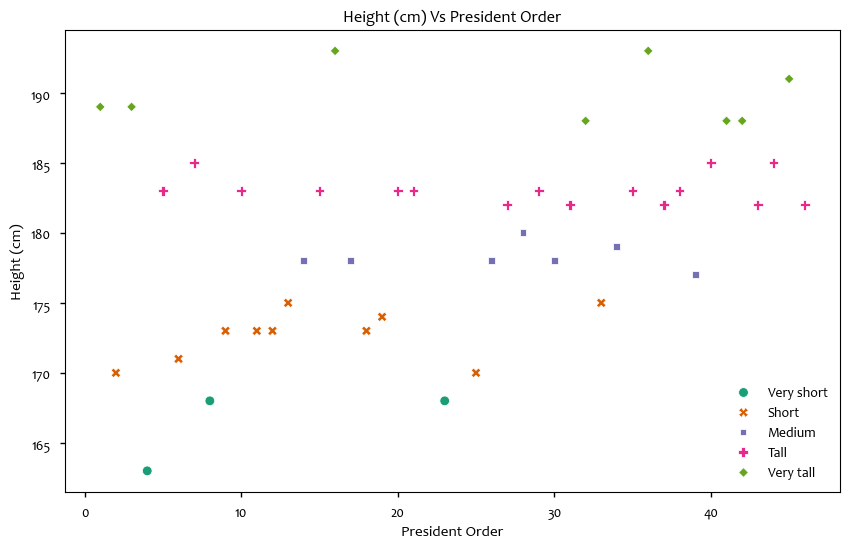

In [140]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.scatterplot(data=df,x=df['order'], y=df['height(cm)'], style='Height Category', hue='Height Category', palette = "Dark2", legend=True)
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Height (cm) Vs President Order')
plt.ylabel('Height (cm)')
plt.xlabel('President Order')
plt.grid(False)
plt.legend(frameon=False)
plt.savefig('Visualizations/ Scatterplot Height (cm) Vs President Order.png')
plt.show()

<h3 style='font-size: 20px; color: crimson; font-family: Candara; font-weight: 600'>📌 Trends in Presidential Heights Over Time</h3>

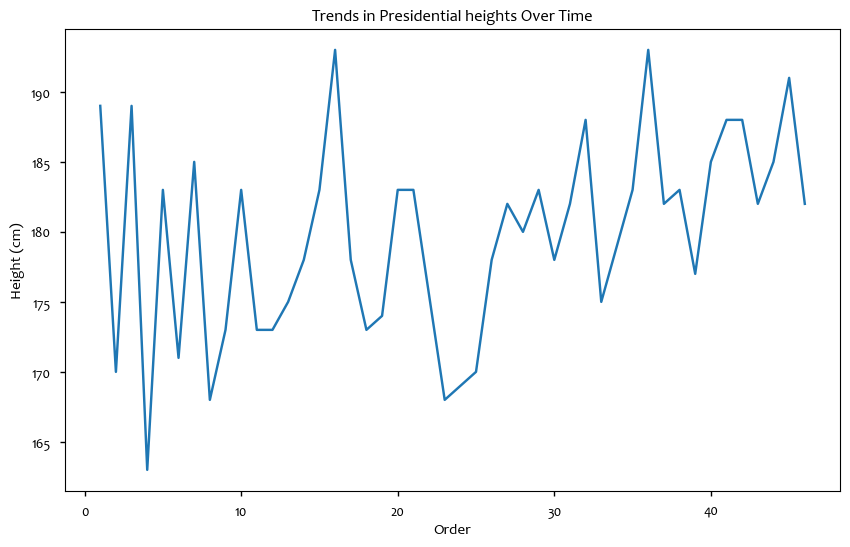

In [141]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.lineplot(data=df,x=df['order'], y=df['height(cm)'], errorbar=None)
plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Trends in Presidential heights Over Time')
plt.ylabel('Height (cm)')
plt.xlabel('Order')
plt.grid(False)
plt.savefig('Visualizations/Trends in Presidential heights Over Time.png')
plt.show()

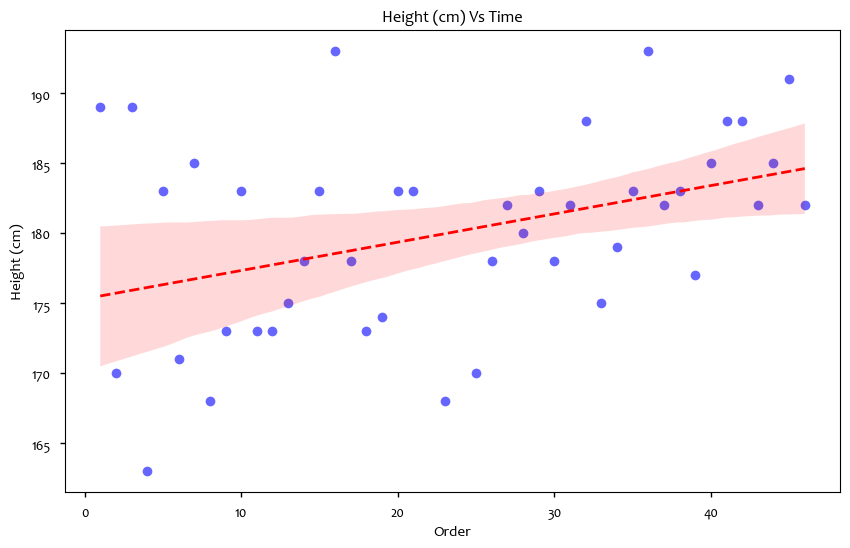

In [142]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-notebook')
sns.regplot(x=df['order'], y=df['height(cm)'], data=df, 
            scatter_kws={'color': 'blue', 'alpha': 0.6}, 
            line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})

plt.rcParams.update({'font.family': 'Candara', 'font.style': 'normal', 'font.size': 12 })
plt.title('Height (cm) Vs Time')
plt.ylabel('Height (cm)')
plt.xlabel('Order')
plt.grid(False)
plt.savefig('Visualizations/Trends in Presidential Heights.png')
plt.show()

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Shortest U.S. President</h3>

In [143]:
df.min()

order                            1
name               Abraham Lincoln
height(cm)                     163
Height Category         Very short
dtype: object

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Tallest U.S. President</h3>

In [144]:
df.max()

order                          46
name               Zachary Taylor
height(cm)                    193
Height Category         Very tall
dtype: object

<h3 style='font-size: 25px; color: crimson; font-family: Candara; font-weight: 600'>📌 Overall Visual Distribution of U.S. Presdential Heights</h3>

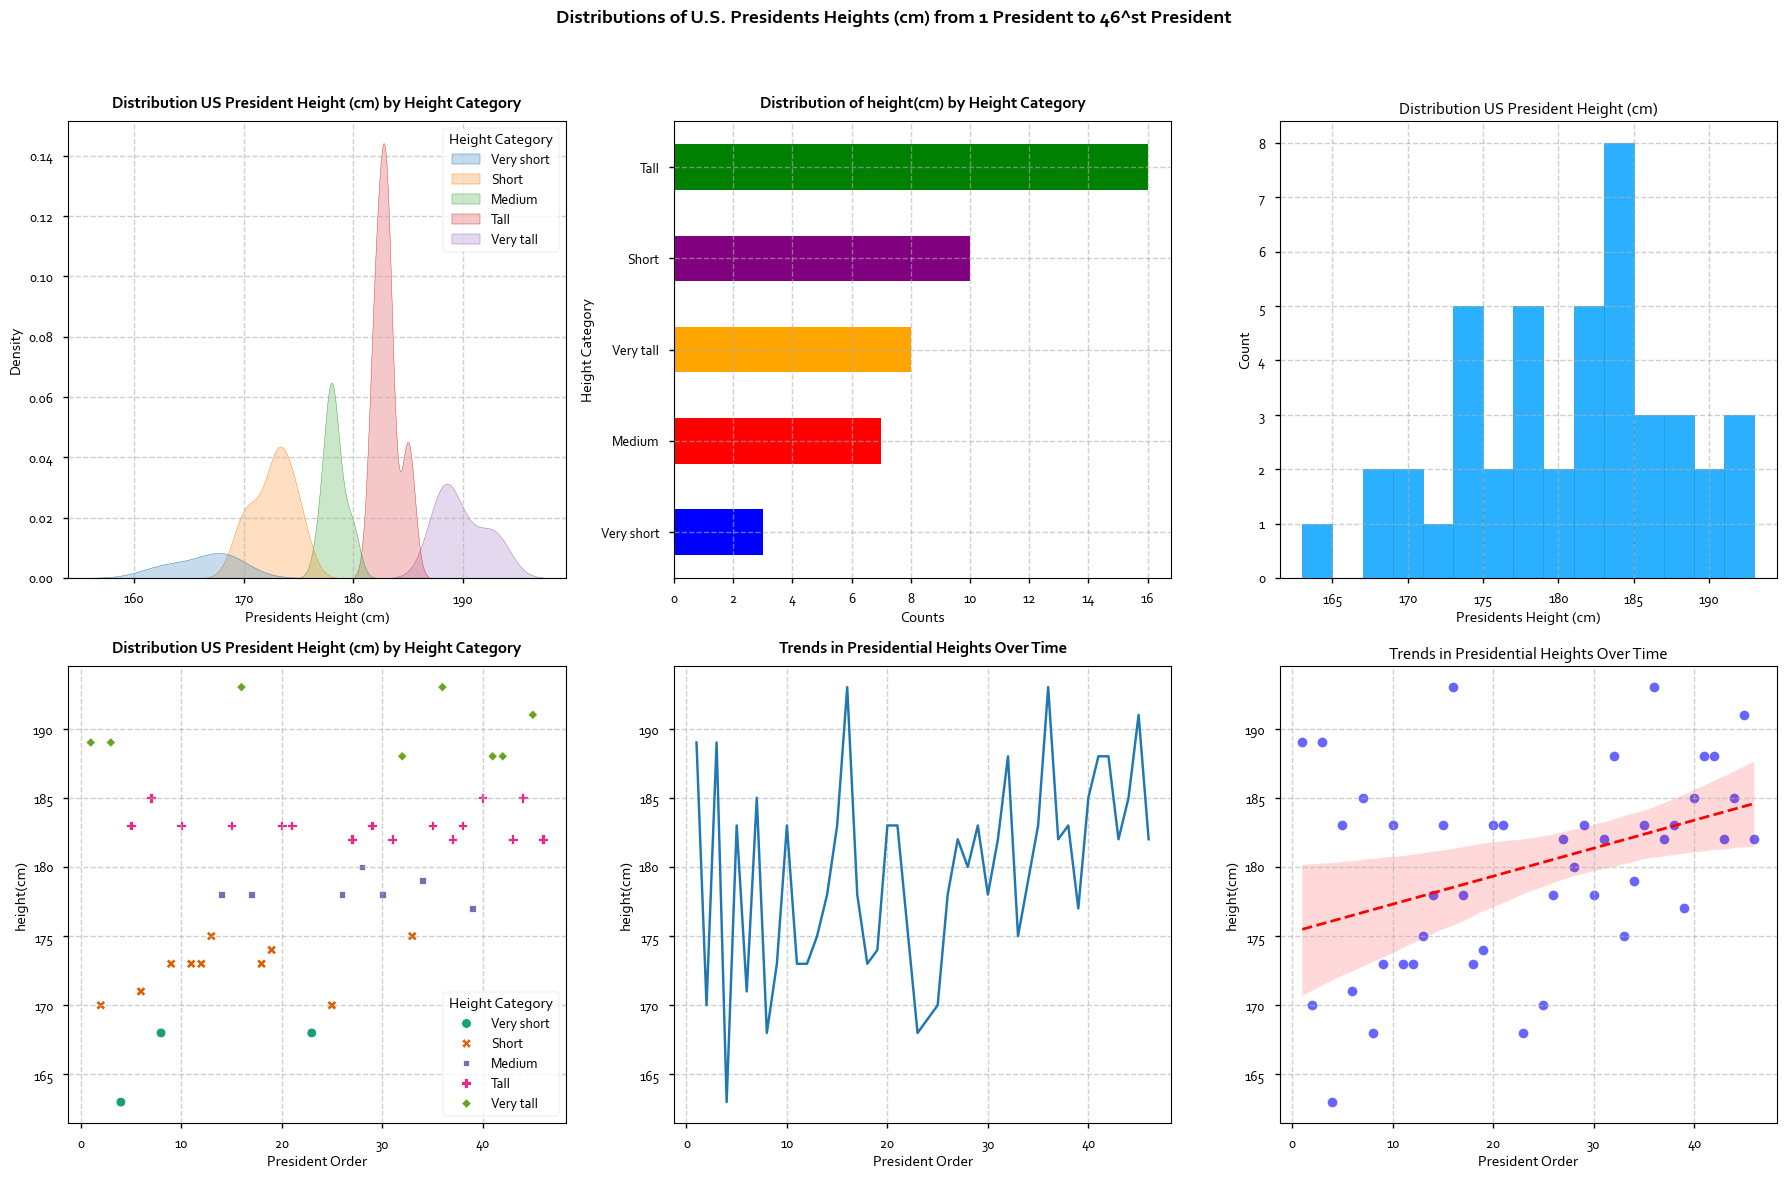

In [153]:
Metrics = ['height(cm)']
for column in Metrics:
    fig, axes = plt.subplots(2, 3, figsize=(18, 6*2))  # Adjusted figsize for better visibility
    plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 11})
    fig.suptitle(f"Distributions of U.S. Presidents Heights (cm) from {df['order'].min()} President to {df['order'].max()} President", fontweight='bold', fontsize=14)
    axes = axes.flatten()
    

    sns.kdeplot(data=df, x=df['height(cm)'], ax=axes[0], fill=True, hue = 'Height Category')
    axes[0].set_title(f"Distribution US President Height (cm) by Height Category", fontsize=12, fontweight='bold',  pad=10)
    axes[0].set_xlabel('Presidents Height (cm)')
    axes[0].grid(linestyle='--', alpha=0.6)

    df['Height Category'].value_counts().sort_values().plot(kind='barh', ax=axes[1], color=['blue', 'red', 'orange', 'purple', 'green'])
    axes[1].set_title(f"Distribution of {column} by Height Category", fontsize=12, fontweight='bold', pad=10)
    axes[1].set_xlabel('Counts')
    axes[1].grid(linestyle='--', alpha=0.6)

    sns.histplot(data=df, x=df['height(cm)'], bins=15, ax=axes[2], facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    axes[2].set_title(f"Distribution US President Height (cm)", fontsize=12)
    axes[2].set_xlabel('Presidents Height (cm)')
    axes[2].grid(linestyle='--', alpha=0.6)

    sns.scatterplot(data=df,x=df['order'], y=df['height(cm)'], ax=axes[3], style='Height Category', hue='Height Category', palette = "Dark2", legend=True)
    axes[3].set_title(f"Distribution US President Height (cm) by Height Category", fontsize=12, fontweight='bold', pad=10)
    axes[3].set_xlabel('President Order')
    axes[3].grid(linestyle='--', alpha=0.6)

    sns.lineplot(data=df,x=df['order'], y=df[column], ax=axes[4], errorbar=None)
    axes[4].set_title(f"Trends in Presidential Heights Over Time", fontsize=12, fontweight='bold', pad=10)
    axes[4].set_xlabel('President Order')
    axes[4].grid(linestyle='--', alpha=0.6)


    sns.regplot(x=df['order'], y=df[column], data=df, ax=axes[5], 
            scatter_kws={'color': 'blue', 'alpha': 0.6}, 
            line_kws={'color': 'red', 'linestyle': '--', 'lw': 2})
    axes[5].set_title(f"Trends in Presidential Heights Over Time", fontsize=12)
    axes[5].set_xlabel('President Order')
    axes[5].grid(linestyle='--', alpha=0.6)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('Visualizations/Overall Visual Distribution of U.S. Presdential Heights 0001.png')
    plt.show()

---
This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via email at **[Jabulente@hotmail.com](Jabulente@hotmail.com)**

----

<h5 style='font-size: 65px; color: crimson; font-family: Amh5erzand; font-weight: 600; text-align: center'>THE END</h5>